Aluno: Cristian Veggian Matias

RA:2150913

Engenharia de Computação - Campus Apucarana

1- A Dream Airlines tem o seguinte mapa de rotas para as cidades que atende, onde cada par de
cidades tem serviço em ambas as direções entre as cidades:

Albuquerque - Atlanta, 
Chicago - New York, 
Chicago - Pinhais, 
Curitiba - Atlanta, 
Curitiba - Chicago, 
Curitiba - Miami, 
Curitiba - New York, 
Curitiba - Sao Paulo, 
Londrina - Foz, 
Maringa - Albuquerque, 
Maringa - Cleveland, 
Miami - Denver, 
Miami - New York, 
Miami - Philadelphia, 
Minneapolis - Foz, 
New York - Cleveland, 
New York - Minneapolis, 
Philadelphia - Atlanta, 
Phoenix - Cleveland, 
Phoenix - Maringa, 
Pinhais - Londrina, 
Ponta Grossa - Cleveland, 
Ponta Grossa - Foz, 
Ponta Grossa - Londrina, 
Sao Paulo - Boston, 
Sao Paulo - Chicago, 
Sao Paulo - Foz, 
Sao Paulo - Londrina, 
Sao Paulo - Minneapolis, 
Sao Paulo - Ponta Grossa, 
Tulsa - Maringa, 
Tulsa - New York

Construa um grafo apropriado que represente esses relacionamentos utilizando o Networkx

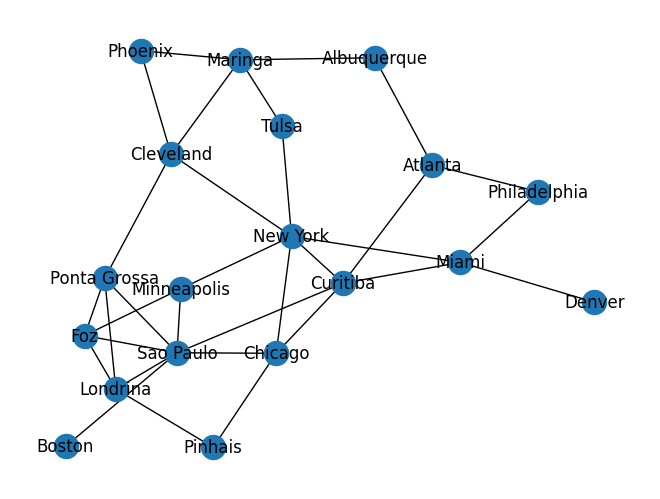

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

nodes_list = ["Albuquerque", "Atlanta", "Chicago", "New York", "Pinhais",
"Curitiba", "Miami", "Sao Paulo", "Londrina", "Foz", "Maringa", "Cleveland",
"Denver", "Philadelphia", "Minneapolis", "Phoenix", "Ponta Grossa", "Boston",
"Tulsa"]

edges_list = [("Albuquerque","Atlanta"), ("Chicago","New York"), ("Chicago","Pinhais"),
("Curitiba","Atlanta"), ("Curitiba","Chicago"),("Curitiba","Miami"),("Curitiba","New York"), 
("Curitiba","Sao Paulo"), ("Londrina","Foz"),("Maringa","Albuquerque"),("Maringa","Cleveland"),
("Miami","Denver"),("Miami","New York"), ("Miami","Philadelphia"),("Minneapolis","Foz"),
("New York","Cleveland"),("New York","Minneapolis"),("Philadelphia","Atlanta"),("Phoenix","Cleveland"),
("Phoenix","Maringa"),("Pinhais","Londrina"),("Ponta Grossa","Cleveland"),("Ponta Grossa","Foz"),
("Ponta Grossa","Londrina"),("Sao Paulo","Boston"),("Sao Paulo","Chicago"),("Sao Paulo","Foz"),
("Sao Paulo","Londrina"),("Sao Paulo","Minneapolis"),("Sao Paulo","Ponta Grossa"), ("Tulsa","Maringa"),
("Tulsa","New York")]

G = nx.Graph()

G.add_nodes_from(nodes_list)
G.add_edges_from(edges_list)

nx.draw(G, with_labels=True)

plt.show()

2- Com base na rede construída no exercício 1, faça o que é proposto abaixo.

a) Qual é o número máximo de saltos que um passageiro pode fazer em uma única viagem entre
duas cidades atendidas?

b) Qual é o coeficiente de clusterização de Curitiba? E da rede geral?

In [8]:
#Número máximo de saltos == Diâmetro == distância máxima entre qualquer par de nós do grafo

print(f"O diâmetro do grafo é {nx.diameter(G)} nós de distância")

#Coeficiente de Clusterização = fração dos vizinhos conectados

clusters = nx.clustering(G)

print(f"O coeficiente de clusterização de Curitiba é {clusters['Curitiba']}")
print(f"O coeficiente de clusterização geral é {nx.average_clustering(G)}")


O diâmetro do grafo é 4 nós de distância
O coeficiente de clusterização de Curitiba é 0.3
O coeficiente de clusterização geral é 0.23709273182957394


3 - Estenda a rede criada na questão 1

a) Adicione o atributo nos nós chamado Country, onde o valor se refere ao país onde cada cidade
está localizada.

b) Adicione o atributo nas arestas chamado Cost. Se uma arestas representa um voo internacional
esse valor deve ser 5, se ela representa um voo nacional o valor deve ser 1.

In [16]:
#Adicionando atributos aos nós
for no in G.nodes:
    if no in ["Maringa", "Curitiba", "Londrina", "Foz", "Sao Paulo", "Ponta Grossa", "Pinhais"]:
        G.nodes[no]["Country"] = "Brasil"
    else:
        G.nodes[no]["Country"] = "EUA"

In [20]:
#Adicionando atributos às arestas
for edge in G.edges:
    if G.nodes[edge[0]]["Country"] == G.nodes[edge[1]]["Country"]:
        G.edges[edge]["Cost"] = 1
    else:
        G.edges[edge]["Cost"] = 5

[('Albuquerque', 'Atlanta', {'Cost': 1}), ('Albuquerque', 'Maringa', {'Cost': 5}), ('Atlanta', 'Curitiba', {'Cost': 5}), ('Atlanta', 'Philadelphia', {'Cost': 1}), ('Chicago', 'New York', {'Cost': 1}), ('Chicago', 'Pinhais', {'Cost': 5}), ('Chicago', 'Curitiba', {'Cost': 5}), ('Chicago', 'Sao Paulo', {'Cost': 5}), ('New York', 'Curitiba', {'Cost': 5}), ('New York', 'Miami', {'Cost': 1}), ('New York', 'Cleveland', {'Cost': 1}), ('New York', 'Minneapolis', {'Cost': 1}), ('New York', 'Tulsa', {'Cost': 1}), ('Pinhais', 'Londrina', {'Cost': 1}), ('Curitiba', 'Miami', {'Cost': 5}), ('Curitiba', 'Sao Paulo', {'Cost': 1}), ('Miami', 'Denver', {'Cost': 1}), ('Miami', 'Philadelphia', {'Cost': 1}), ('Sao Paulo', 'Boston', {'Cost': 5}), ('Sao Paulo', 'Foz', {'Cost': 1}), ('Sao Paulo', 'Londrina', {'Cost': 1}), ('Sao Paulo', 'Minneapolis', {'Cost': 5}), ('Sao Paulo', 'Ponta Grossa', {'Cost': 1}), ('Londrina', 'Foz', {'Cost': 1}), ('Londrina', 'Ponta Grossa', {'Cost': 1}), ('Foz', 'Minneapolis', {'Co

4 – Exporte a rede final criada na questão 3 no formato .GML. Confira se todas as informações
pedidas anteriormente estão disponíveis nesse arquivo.

In [21]:
nx.write_gml(G, "ex1-4.gml")